# Problem Set 3 CS129.18

The following problem set will revolve around the Enron Emails dataset.
The dataset `data/enron-data/` directory has 6 files. The objective is to build a classifier for whether email is spam or not.


## Requirements


>Spam or Ham?

Using the lessons on Naive Bayes and TF-IDF, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

**Using Enron 1 and 2**

1. How many Spam Emails are there? ( 1 pt )

2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )

3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )

4. What is the longest ham email? ( 1 pt )

5. What is the accuracy of your model?( 1 pt )

6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)



-----


Bonus : Answer questions 1-6 using Enron 1,2, and 3. (5 pts)

----

**Submit this file on Moodle on the submission link I will provide. This is due October 18 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import re
import email
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
rootdir_1 = "data/enron-data/enron1"
# Loop through all the directories, sub directories and files in the above folder, and print them.
for directories, subdirs, files in os.walk(rootdir_1):
    print(directories, subdirs, len(files))

data/enron-data/enron1 ['ham', 'spam'] 2
data/enron-data/enron1\ham [] 3672
data/enron-data/enron1\spam [] 1499


In [3]:
ham_list_1 = []
spam_list_1 = []

# Same as before, but this time, read the files, and append them to the ham and spam list
for directories, subdirs, files in os.walk(rootdir_1):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list_1.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam_list_1.append(data)


In [4]:
rootdir_2 = "data/enron-data/enron2"
# Loop through all the directories, sub directories and files in the above folder, and print them.
for directories, subdirs, files in os.walk(rootdir_2):
    print(directories, subdirs, len(files))

data/enron-data/enron2 ['ham', 'spam'] 1
data/enron-data/enron2\ham [] 4361
data/enron-data/enron2\spam [] 1494


In [5]:
ham_list_2 = []
spam_list_2 = []

# Same as before, but this time, read the files, and append them to the ham and spam list
for directories, subdirs, files in os.walk(rootdir_2):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list_2.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam_list_2.append(data)

### 1. How many Spam Emails are there? ( 1 pt )

Based on the directory details, there are (1494 + 1499) spam emails in the enron1 and enron2 folders

### 2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )

In [6]:
# loop and build a dataframe 
# combining the spam and non spam lists
ham_list = ham_list_1 + ham_list_2 
spam_list = spam_list_1 + spam_list_2

In [7]:
#creating individual lists for status, subject and body per email by parsing first the list of hams, then the list of spams
status_list = []
subject_list = []
body_list = []

for mail in ham_list:
    msg = email.message_from_string(mail)
    status = "ham"
    subject = msg['subject']
    if msg.is_multipart():
        for part in msg.walk():
            part_list = []
            payload = part.get_payload(decode=False) 
            part_list.append(payload)
            payload = ' '.join(part_list)
    else:
        payload = msg.get_payload(decode=False)
    status_list.append(status)
    subject_list.append(subject)
    body_list.append(payload)
    

In [8]:
for mail in spam_list:
    msg = email.message_from_string(mail)
    status = "spam"
    subject = msg['subject']
    if msg.is_multipart():
        for part in msg.walk():
            part_list = []
            payload = part.get_payload(decode=False) 
            part_list.append(payload)
            payload = ' '.join(part_list)
    else:
        payload = msg.get_payload(decode=False)
    status_list.append(status)
    subject_list.append(subject)
    body_list.append(payload)

In [9]:
print(len(status_list))
print(len(subject_list))
print(len(body_list))

11026
11026
11026


In [10]:
# Create pandas dataframe from lists
df = pd.DataFrame(list(zip(status_list, subject_list, body_list)), columns = ['Status', 'Subject', 'Body'])

In [11]:
df.head(10)

,Status,Subject,Body
0,ham,christmas tree farm pictures,
1,ham,"vastar resources , inc .","gary , production from the high island larger ..."
2,ham,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,ham,re : issue,fyi - see note below - already done .\nstella\...
4,ham,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...
5,ham,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ..."
6,ham,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\..."
7,ham,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...
8,ham,king ranch,there are two fields of gas that i am having d...
9,ham,re : entex transistion,thanks so much for the memo . i would like to ...


### 3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )


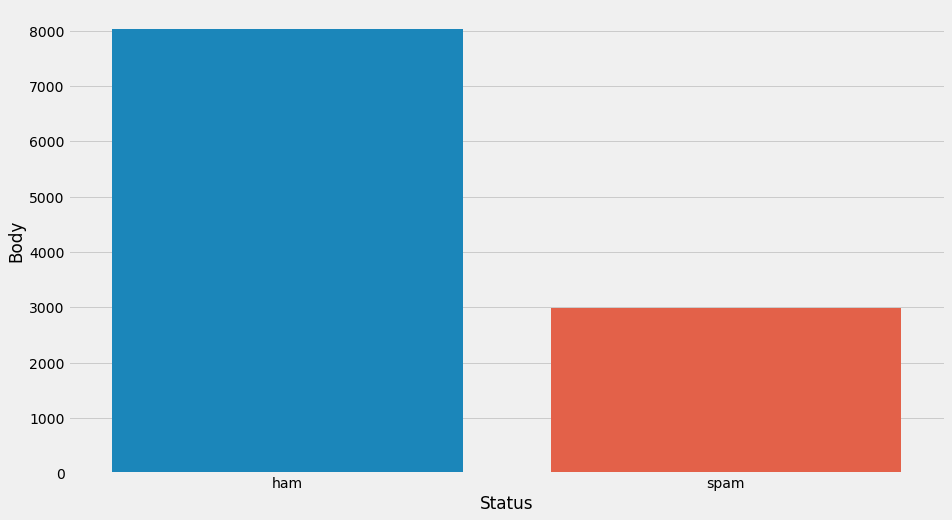

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))

df_2 = df.groupby('Status').count()
df_2.reset_index(inplace=True)
sns.barplot(x='Status', y='Body', data=df_2);

In [13]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

train_x, test_x, train_y, test_y = train_test_split(df["Body"], df["Status"], test_size = 0.30, stratify = df["Status"],random_state=17) #preserve the distribution

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)

In [15]:
index_value={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
fully_indexed = []
for row in tfidf_train_x:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [16]:
classifier = GaussianNB()
classifier.fit(tfidf_train_x.toarray(), train_y)

GaussianNB()

In [17]:
tfidf_test_x = vectorizer.transform(test_x) #applying tf-idf to the test data
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5) #cross-validation
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

(3308, 58235)
Accuracy: 93.98 percent


,ham,spam,accuracy,macro avg,weighted avg
precision,0.941481,0.943467,0.941959,0.942474,0.942020
recall,0.981328,0.836303,0.941959,0.908815,0.941959
f1-score,0.960991,0.886659,0.941959,0.923825,0.940813
support,2410.000000,898.000000,0.941959,3308.000000,3308.000000


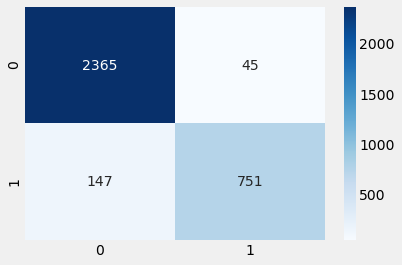

In [18]:
# Checking out the confusion matrix from one random train test split 


predictions = classifier.predict(tfidf_test_x.toarray())

cf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
pd.DataFrame(classification_report(test_y,predictions,output_dict=True))

### 4. What is the longest ham email? ( 1 pt )

In [19]:
max(ham_list, key=len); #output is hidden, but here is a line to get the longest ham email from the list of hams

### 5. What is the accuracy of your model?( 1 pt )

The accuracy of the model is 93.98 percent

### 6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)

In [20]:
# I'll be concatenating the Subject + Body columns together.
df['subject_body'] = df["Subject"] + df["Body"]

In [21]:
df.head()

,Status,Subject,Body,subject_body
0,ham,christmas tree farm pictures,,christmas tree farm pictures
1,ham,"vastar resources , inc .","gary , production from the high island larger ...","vastar resources , inc .gary , production from..."
2,ham,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,calpine daily gas nomination- calpine daily ga...
3,ham,re : issue,fyi - see note below - already done .\nstella\...,re : issuefyi - see note below - already done ...
4,ham,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,meter 7268 nov allocationfyi .\n- - - - - - - ...


In [22]:
train_x, test_x, train_y, test_y = train_test_split(df["subject_body"], df["Status"], test_size = 0.30, stratify = df["Status"], random_state=17) #preserve the distribution

In [23]:
vectorizer = TfidfVectorizer(stop_words='english') #initialize a tf_idf vectorizer
tfidf_train_x = vectorizer.fit_transform(train_x) # fit and transform the training data from the initialized tf-idf vectorizer

In [24]:
index_value={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
fully_indexed = []
# build a  dictionary of unique words in documents and corresponding tf-idf score
for row in tfidf_train_x:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [25]:
classifier = GaussianNB()
classifier.fit(tfidf_train_x.toarray(), train_y)

GaussianNB()

In [26]:
tfidf_test_x = vectorizer.transform(test_x)
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

(3308, 63456)
Accuracy: 94.56 percent


,ham,spam,accuracy,macro avg,weighted avg
precision,0.958333,0.950957,0.956469,0.954645,0.956331
recall,0.982988,0.885301,0.956469,0.934144,0.956469
f1-score,0.970504,0.916955,0.956469,0.943729,0.955967
support,2410.000000,898.000000,0.956469,3308.000000,3308.000000


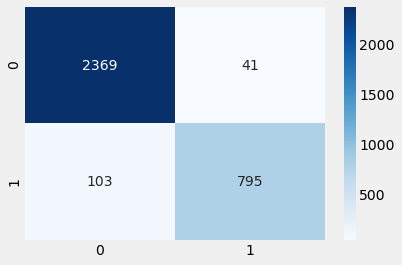

In [27]:
# Checking out the confusion matrix from one random train test split 


predictions = classifier.predict(tfidf_test_x.toarray())

cf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
pd.DataFrame(classification_report(test_y,predictions,output_dict=True))

The cross-validated accuracy improved by almost 1 percent! (0.98%) and precision and recall for spam emails has improved by a bit too.

Points of exploration from my approach to the modeling problem:
- In terms of parsing the texts, I opted to include everything after the first subject line. i.e. for email threads, I kept the subject lines from the following email threads, miscellaneous symbols like '------' and also the to, from, date lines. For next possible iteration, I could be more specific in how I parse the email texts.
